<h1><center>Colour-Colour Redshift Plot</center></h1>



In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Complete the following to make the plot
if __name__ == "__main__":
    data = pd.read_csv('opticaldatafinals_SDSS.csv')
    # Get a colour map
    cmap = plt.get_cmap('YlOrRd')

    # Define our colour indexes u-g and r-i
    u_g = data['u'] - data['g']
    r_i = data['r'] - data['i']

    # Make a redshift array
    redshift = data['redshift']

    # Create the plot with plt.scatter
    plot = plt.scatter(u_g, r_i, s=0.5, lw=0, c=redshift, cmap=cmap)

    cb = plt.colorbar(plot)
    cb.set_label('Redshift')

    # Define your axis labels and plot title
    plt.xlabel('Colour index  u-g')
    plt.ylabel('Colour index  r-i')
    plt.title('Redshift (colour) u-g versus r-i')

    # Set any axis limits
    plt.xlim(-0.5, 2.5)
    plt.ylim(-0.5, 1)
    plt.show()

<h1><center>Overfitting Trees</center></h1>



Depth with lowest median difference : 13


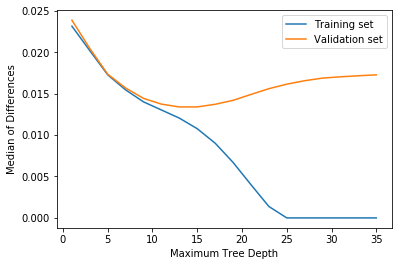

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# paste your get_features_targets function here
def get_features_targets(data):
  features = np.zeros((data.shape[0], 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets

# paste your median_diff function here
def median_diff(predicted, actual):
  return np.median(np.abs(predicted - actual))

# Complete the following function
def accuracy_by_treedepth(features, targets, depths):
  # split the data into testing and training sets
  split = features.shape[0]//2
  train_features, test_features = features[:split], features[split:]
  train_targets, test_targets = targets[:split], targets[split:]

  # Initialise arrays or lists to store the accuracies for the below loop
  train_diffs = []
  test_diffs = []

  # Loop through depths
  for depth in depths:
    # initialize model with the maximum depth. 
    dtr = DecisionTreeRegressor(max_depth=depth)

    # train the model using the training set
    dtr.fit(train_features, train_targets)

    # Get the predictions for the training set and calculate their med_diff
    predictions = dtr.predict(train_features)
    train_diffs.append(median_diff(train_targets, predictions))

    # Get the predictions for the testing set and calculate their med_diff
    predictions = dtr.predict(test_features)
    test_diffs.append(median_diff(test_targets, predictions))
        
  # Return the accuracies for the training and testing sets
  return train_diffs, test_diffs    

if __name__ == "__main__":
    data = pd.read_csv('opticaldatafinals_SDSS.csv')
    features, targets = get_features_targets(data)

  # Generate several depths to test
    tree_depths = [i for i in range(1, 36, 2)]

  # Call the function
    train_med_diffs, test_med_diffs = accuracy_by_treedepth(features, targets, tree_depths)
    print("Depth with lowest median difference : {}".format(tree_depths[test_med_diffs.index(min(test_med_diffs))]))

  # Plot the results
    train_plot = plt.plot(tree_depths, train_med_diffs, label='Training set')
    test_plot = plt.plot(tree_depths, test_med_diffs, label='Validation set')
    plt.xlabel("Maximum Tree Depth")
    plt.ylabel("Median of Differences")
    plt.legend()
    plt.show()

<h1><center> KFold Cross Validation</center></h1>



In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor

def get_features_targets(data):
  features = np.zeros((data.shape[0], 4)) #n lines, 4 columns
  features[:,0] = data['u'] - data['g']
  features[:,1] = data['g'] - data['r']
  features[:,2] = data['r'] - data['i']
  features[:,3] = data['i'] - data['z']
  targets = data['redshift']
  return (features, targets)

def median_diff(predicted, actual):
  diff = np.median(np.absolute(predicted - actual))
  return diff

# complete this function
def cross_validate_model(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

  # initialise a list to collect median_diffs for each iteration of the loop below
  mediandiffs = []
  
  for train_indices, test_indices in kf.split(features):
    train_features, test_features = features[train_indices], features[test_indices]
    train_targets, test_targets = targets[train_indices], targets[test_indices]
    
    # fit the model for the current set
    model.fit(train_features, train_targets)
    
    # predict using the model
    predictions = model.predict(test_features)

    # calculate the median_diff from predicted values and append to results array
    mediandiffs.append(median_diff(test_targets, predictions))
 
  # return the list with your median difference values
  return mediandiffs

if __name__ == "__main__":
  data = pd.read_csv('opticaldatafinals_SDSS.csv')
  features, targets = get_features_targets(data)

  # initialize model with a maximum depth of 19
  dtr = DecisionTreeRegressor(max_depth=19)

  # call your cross validation function
  diffs = cross_validate_model(dtr, features, targets, 10)

  # Print the values
  print('Differences: {}'.format(', '.join(['{:.3f}'.format(val) for val in diffs])))
  print('Mean difference: {:.3f}'.format(np.mean(diffs)))

Differences: 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014
Mean difference: 0.014


 <h2><center>KFold Cross Validated Predictions</h2></center>

Median difference: 0.014


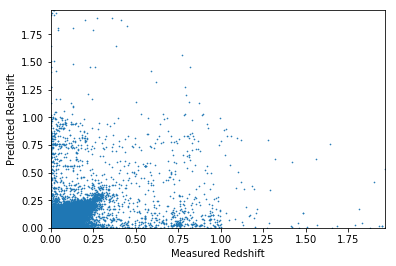

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

# paste your get_features_targets function here
def get_features_targets(data):
  features = np.zeros((data.shape[0], 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets

# paste your median_diff function here
def median_diff(predicted, actual):
  return np.median(np.abs(predicted - actual))

# complete this function
def cross_validate_predictions(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

  # declare an array for predicted redshifts from each iteration
  all_predictions = np.zeros_like(targets)

  for train_indices, test_indices in kf.split(features):
    # split the data into training and testing
    train_features, test_features = features[train_indices], features[test_indices]
    train_targets, test_targets = targets[train_indices], targets[test_indices]
    
    # fit the model for the current set
    model.fit(train_features, train_targets)
        
    # predict using the model
    predictions = model.predict(test_features)
        
    # put the predicted values in the all_predictions array defined above
    all_predictions[test_indices] = predictions

  # return the predictions
  return all_predictions


if __name__ == "__main__":
  data = pd.read_csv('opticaldatafinals_SDSS.csv')
  features, targets = get_features_targets(data)

  # initialize model
  dtr = DecisionTreeRegressor(max_depth=19)

  # call your cross validation function
  predictions = cross_validate_predictions(dtr, features, targets, 10)

  # calculate and print the rmsd as a sanity check
  diffs = median_diff(predictions, targets)
  print('Median difference: {:.3f}'.format(diffs))

  # plot the results to see how well our model looks
  plt.scatter(targets, predictions, s=0.4)
  plt.xlim((0, targets.max()))
  plt.ylim((0, predictions.max()))
  plt.xlabel('Measured Redshift')
  plt.ylabel('Predicted Redshift')
  plt.show()

<h1><center>Splitting the train and test sets</center></h1>

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('opticaldatafinals_SDSS.csv',delimiter=",")


fraction_training = 0.7
  # split the data using your function
training,testing = train_test_split(data, test_size = 0.7, random_state = 0)

  # print the key values
print('Number data galaxies:', len(data))
print('Train fraction:', fraction_training)
print('Number of galaxies in training set:', len(training))
print('Number of galaxies in testing set:', len(testing))

Number data galaxies: 370082
Train fraction: 0.7
Number of galaxies in training set: 111024
Number of galaxies in testing set: 259058


<h1><center>Generating features and targets</center></h1>

In [9]:
import numpy as np
import pandas as pd

def generate_features_targets(data):
  # complete the function by calculating the concentrations

  targets = data['class']

  features = np.empty(shape=(len(data), 13))
  features[:, 0] = data['u-g']
  features[:, 1] = data['g-r']
  features[:, 2] = data['r-i']
  features[:, 3] = data['i-z']
  features[:, 4] = data['ellipticity']
  features[:, 5] = data['mCr4_u']
  features[:, 6] = data['mCr4_g']
  features[:, 7] = data['mCr4_r']
  features[:, 8] = data['mCr4_i']
  features[:, 9] = data['mCr4_z']

  # fill the remaining 3 columns with concentrations in the u, r and z filters
  # concentration in u filter
  features[:, 10] = data['petroR50_u']/data['petroR90_u']
  # concentration in r filter
  features[:, 11] = data['petroR50_r']/data['petroR90_r']
  # concentration in z filter
  features[:, 12] = data['petroR50_z']/data['petroR90_z']

  return features, targets


if __name__ == "__main__":
  data = pd.read_csv('opticaldatafinals_SDSS.csv')

  features, targets = generate_features_targets(data)

  # Print the shape of each array to check the arrays are the correct dimensions. 
  print("Features shape:", features.shape)
  print("Targets shape:", targets.shape)

Features shape: (370082, 13)
Targets shape: (370082,)


<h1><center>Train the decision tree classifier</center></h1>

In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

def generate_features_targets(data):
    targets = data['class1']
    
    features = np.empty(shape=(len(data), 13))
    features[:, 0] = data['u-g']
    features[:, 1] = data['g-r']
    features[:, 2] = data['r-i']
    features[:, 3] = data['i-z']
    features[:, 4] = data['ellipticity'] 
    features[:, 5] = data['mCr4_u']
    features[:, 6] = data['mCr4_g']
    features[:, 7] = data['mCr4_r']
    features[:, 8] = data['mCr4_i']
    features[:, 9] = data['mCr4_z']
    features[:, 10] = data['petroR50_u']/data['petroR90_u']
    features[:, 11] = data['petroR50_r']/data['petroR90_r']
    features[:, 12] = data['petroR50_z']/data['petroR90_z']
    return features, targets

# complete this function by splitting the data set and training a decision tree classifier
def dtc_predict_actual(data):
    training,testing = train_test_split(data, test_size = 0.7)
    features_training, targets_training = generate_features_targets(training)
    features_testing, targets_testing = generate_features_targets(testing)
    dtc = DecisionTreeClassifier()
    dtc.fit(features_training, targets_training)
    predictions = dtc.predict(features_testing)
    return predictions, targets_testing


if __name__ == '__main__':
    data = pd.read_csv('opticaldatafinals_SDSS.csv')  
    predicted_class, actual_class = dtc_predict_actual(data)

  # Print some of the initial results
    print("Some initial results...\n   predicted,  actual")
    for i in range(1):
        print("{}. {}, {}".format(i, predicted_class[i], actual_class[i]))

Some initial results...
   predicted,  actual
0. E2, E4


<center><h1> Accuracy in classification</h1></center>

Our accuracy score: 0.9999891915845678
Confusion matrix, without normalization
[[  5943      0      0      0      0      0      0      0      0      0]
 [     0  33985      0      0      0      0      0      0      0      0]
 [     0      0    902      0      0      0      0      0      0      0]
 [     0      0      0  82826      0      0      0      0      0      0]
 [     0      0      0      1 100339      0      0      0      1      0]
 [     0      0      0      0      0    124      0      0      0      0]
 [     0      0      0      0      0      1     73      0      0      0]
 [     0      0      0      0      0      0      0  51765      1      0]
 [     0      0      0      0      0      0      0      0  74823      0]
 [     0      0      0      0      0      0      0      0      0  19298]]


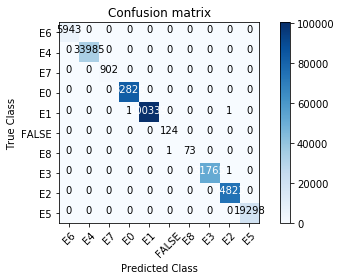

In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
import itertools


def generate_features_targets(data):
    output_targets = np.empty(shape=(len(data)), dtype='<U20')
    output_targets[:] = data['class1']

    input_features = np.empty(shape=(len(data), 13))
    input_features[:, 0] = data['u-g']
    input_features[:, 1] = data['g-r']
    input_features[:, 2] = data['r-i']
    input_features[:, 3] = data['i-z']
    input_features[:, 4] = data['ellipticity']
    input_features[:, 5] = data['mCr4_u']
    input_features[:, 6] = data['mCr4_g']
    input_features[:, 7] = data['mCr4_r']
    input_features[:, 8] = data['mCr4_i']
    input_features[:, 9] = data['mCr4_z']
    input_features[:, 10] = data['petroR50_u'] / data['petroR90_u']
    input_features[:, 11] = data['petroR50_r'] / data['petroR90_r']
    input_features[:, 12] = data['petroR50_z'] / data['petroR90_z']

    return input_features, output_targets



def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """ This function prints and plots the confusion matrix.Normalization can be applied by setting `normalize=True` """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{}".format(cm[i, j]),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True Class')
        plt.xlabel('Predicted Class')


def calculate_accuracy(predicted, actual):
    correct = 0
  
  # iterate over the two lists simultaneously
    for p,a in zip(predicted,actual):
        if p == a:
            correct += 1
  
    accuracy = correct / len(actual)
    return accuracy


if __name__ == "__main__":
    data = pd.read_csv('opticaldatafinals_SDSS.csv') 

  # split the data
    features, targets = generate_features_targets(data)

      # train the model to get predicted and actual classes
    dtc = DecisionTreeClassifier()
    predicted = cross_val_predict(dtc, features, targets, cv=10)

    # calculate the model score using your function
    model_score = calculate_accuracy(predicted, targets)
    print("Our accuracy score:", model_score)

    # calculate the models confusion matrix using sklearns confusion_matrix function
    class_labels = list(set(targets))
    model_cm = confusion_matrix(y_true=targets, y_pred=predicted, labels=class_labels)

    # Plot the confusion matrix using the provided functions.
    plt.figure()
    plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
    plt.show()